In [1]:
# 패키지 임포트
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import time
from tqdm import tqdm_notebook
import urllib
from urllib.request import urlopen

In [10]:
df = pd.read_csv('./서울 서대문구 음식점 샘플1000(아이디)(별점추가).csv',encoding='cp949')
df

,영업상태명,상세영업상태코드,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
0,영업/정상,1,영업,02 3754388,49.01,120805.0,서울특별시 서대문구 남가좌동 295-5,서울특별시 서대문구 수색로 42 (남가좌동),3712.0,갤러리,2.022050e+13,U,2021-12-05 0:04,한식,192344.5441,452002.2787,NaN,1050286731,-
1,영업/정상,1,영업,NaN,87.54,120848.0,서울특별시 서대문구 홍은동 397-26 1층,서울특별시 서대문구 가좌로 86 1층 (홍은동),3659.0,홍가족발집,2.022040e+13,U,2021-12-03 21:00,한식,193566.3060,453168.2097,NaN,293341203,4.32
2,영업/정상,1,영업,NaN,45.00,120812.0,서울특별시 서대문구 북가좌동 279-12 1층,서울특별시 서대문구 응암로 116 1층 (북가좌동),3667.0,왕노가리,2.020110e+13,U,2020-11-08 2:40,한식,192308.8448,453379.4394,한식,1887456010,4.39
3,영업/정상,1,영업,NaN,24.00,120848.0,서울특별시 서대문구 홍은동 355번지 제마동 102호,서울특별시 서대문구 가좌로 123 (홍은동 제마동 102호),3675.0,빅스타,2.015090e+13,I,2018-08-31 23:59,기타,193281.5851,453439.2702,기타,1684270213,4.41
4,영업/정상,1,영업,02 31423989,118.80,120825.0,서울특별시 서대문구 연희동 192-17번지,서울특별시 서대문구 성산로 333 (연희동),3707.0,궁뜰메밀,2.019010e+13,U,2019-01-13 2:40,한식,193512.5172,451546.5096,한식,38466760,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,영업/정상,1,영업,02 303 5445,122.62,120814.0,서울특별시 서대문구 북가좌동 326-20,서울특별시 서대문구 응암로1길 4 (북가좌동),3678.0,왔다 산아나고구이,2.021080e+13,U,2021-08-07 2:40,한식,192136.8159,453212.5809,한식,31397389,4.16
996,영업/정상,1,영업,02 3625150,86.28,120020.0,서울특별시 서대문구 미근동 31-13,서울특별시 서대문구 통일로 107-29 (미근동),3739.0,바른고기,2.021070e+13,U,2021-07-07 2:40,분식,197014.3350,451350.8161,분식,1636189590,4.53
997,영업/정상,1,영업,NaN,232.00,120859.0,서울특별시 서대문구 홍제동 323-11 수라면옥,서울특별시 서대문구 홍제내길 232 수라면옥 1층 (홍제동),3636.0,한점 할겸,2.022010e+13,U,2022-01-20 2:40,한식,194748.4643,454263.8341,한식,1697370916,-
998,영업/정상,1,영업,NaN,26.40,120830.0,서울특별시 서대문구 연희동 187-60 1층 일부,서울특별시 서대문구 연희로 90 1층 (연희동),3725.0,네네치킨 연희점,2.021090e+13,U,2021-09-29 2:40,호프/통닭,193787.3750,451524.1650,호프/통닭,-,-


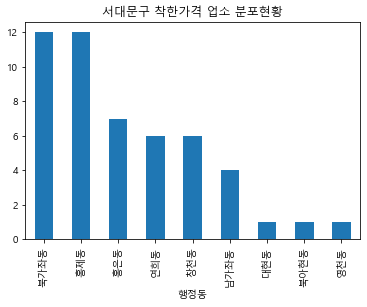

In [15]:
dfb = df[df['지번주소'].str.contains('북가좌동')==True]
dfb

,영업상태명,상세영업상태코드,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
2,영업/정상,1,영업,NaN,45.00,120812.0,서울특별시 서대문구 북가좌동 279-12 1층,서울특별시 서대문구 응암로 116 1층 (북가좌동),3667.0,왕노가리,2.020110e+13,U,2020-11-08 2:40,한식,192308.8448,453379.4394,한식,1887456010,4.39
15,영업/정상,1,영업,NaN,37.00,120814.0,서울특별시 서대문구 북가좌동 311-22,서울특별시 서대문구 거북골로20길 53-28 1층 (북가좌동),3679.0,착한쭝식,2.022060e+13,U,2021-12-05 22:03,한식,191973.7532,453177.2295,NaN,1456735147,-
21,영업/정상,1,영업,02 306 1903,51.15,120812.0,서울특별시 서대문구 북가좌동 291-4번지,서울특별시 서대문구 증가로 215 (북가좌동),3682.0,거북골숯불갈비,2.011080e+13,I,2018-08-31 23:59,한식,192405.9973,453187.5254,한식,13347695,4.44
105,영업/정상,1,영업,02 373 7278,40.00,120813.0,서울특별시 서대문구 북가좌동 304-1번지 1층 일부,서울특별시 서대문구 거북골로18길 8 1층 (북가좌동),3691.0,프레즐메이커,2.018080e+13,I,2018-08-31 23:59,기타,192031.6656,452836.2456,기타,35495367,4.53
111,영업/정상,1,영업,NaN,32.80,120816.0,서울특별시 서대문구 북가좌동 351-2번지 1층,서울특별시 서대문구 응암로 146 1층 (북가좌동),3667.0,홍주식당,2.018060e+13,I,2018-08-31 23:59,한식,192456.3669,453652.4601,한식,1667981727,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,영업/정상,1,영업,02 304 3854,37.95,120812.0,서울특별시 서대문구 북가좌동 292-1번지 지상1층,서울특별시 서대문구 응암로 108 (북가좌동지상1층),3682.0,부산숯불꼼장어,2.008100e+13,I,2018-08-31 23:59,한식,192276.7374,453314.5502,한식,1556639075,4.34
951,영업/정상,1,영업,203056394,106.30,120816.0,서울특별시 서대문구 북가좌동 351-5 지하1층,서울특별시 서대문구 응암로 144 지하1층 (북가좌동),3667.0,문래돼지불백,2.021110e+13,U,2021-11-04 2:40,한식,192446.9660,453619.9369,한식,1981636384,4.37
970,영업/정상,1,영업,NaN,81.25,120816.0,서울특별시 서대문구 북가좌동 383-10번지,서울특별시 서대문구 수색로10길 6-2 (북가좌동),3714.0,여수아구찜,2.014030e+13,I,2018-08-31 23:59,한식,191587.7303,452559.5019,한식,18757253,4.16
975,영업/정상,1,영업,NaN,18.95,120812.0,서울특별시 서대문구 북가좌동 294-23 1층,서울특별시 서대문구 증가로25길 17 1층 (북가좌동),NaN,사랑애포차,2.021070e+13,U,2021-07-22 2:40,한식,192277.5606,453208.2023,한식,-,-


In [14]:
dfh = df[df['지번주소'].str.contains('홍제동')==True]
dfh

,영업상태명,상세영업상태코드,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
9,영업/정상,1,영업,NaN,66.00,120854.0,서울특별시 서대문구 홍제동 109-1 1층 정면 우측점포,서울특별시 서대문구 통일로34길 7 1층 정면 우측점포 (홍제동),3632.0,헤일우드(HALEWOOD),2.022010e+13,U,2022-01-27 2:40,한식,195388.8304,453679.5797,한식,-,-
14,영업/정상,1,영업,02 7225585,42.88,120856.0,서울특별시 서대문구 홍제동 176-9,서울특별시 서대문구 통일로36길 7 (홍제동),3630.0,홍제동부대찌개,2.021080e+13,U,2021-08-15 2:40,일식,195194.5397,453921.0946,일식,33832996,4.04
16,영업/정상,1,영업,02 7252220,206.78,120853.0,서울특별시 서대문구 홍제동 90-53 지하1층지상1층,서울특별시 서대문구 통일로 377 (홍제동 지하1층지상1층),3730.0,서대문영양족발,2.021090e+13,U,2021-09-05 2:40,한식,195439.9703,453496.4536,한식,36406584,4.32
20,영업/정상,1,영업,02 395 2066,33.00,120857.0,서울특별시 서대문구 홍제동 304-6번지 (지상1층),서울특별시 서대문구 세무서1길 28 (홍제동(지상1층)),3629.0,삼대냉면,2.011110e+13,I,2018-08-31 23:59,분식,195008.0749,454097.6882,분식,847623888,4.16
27,영업/정상,1,영업,NaN,19.80,120857.0,서울특별시 서대문구 홍제동 268-14,서울특별시 서대문구 세무서길 78 1층 (홍제동),3627.0,킹부대찌개 홍제점,2.020090e+13,I,2020-09-24 0:23,한식,195247.5981,454319.8586,한식,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,영업/정상,1,영업,02 60804943,12.00,120856.0,서울특별시 서대문구 홍제동 201-9 1층,서울특별시 서대문구 세무서2길 34 1층 (홍제동),3630.0,포미,2.022040e+13,U,2021-12-03 21:00,기타,195280.9526,454035.0232,NaN,1142807032,4.71
976,영업/정상,1,영업,02 396 5720,20.32,120857.0,서울특별시 서대문구 홍제동 264-7번지 1층,서울특별시 서대문구 통일로40안길 35 1층 (홍제동),3628.0,산내들,2.018050e+13,I,2018-08-31 23:59,한식,195034.3624,454364.5547,한식,1627377982,-
981,영업/정상,1,영업,203957142,14.98,120857.0,서울특별시 서대문구 홍제동 299-23,서울특별시 서대문구 통일로40길 5 (홍제동),3628.0,왕십리곱창,2.021080e+13,U,2021-08-04 2:40,한식,194910.0307,454222.0402,한식,1059535984,4.65
983,영업/정상,1,영업,02 394 3334,49.00,120857.0,서울특별시 서대문구 홍제동 261-1 1층,서울특별시 서대문구 통일로40안길 34 1층 (홍제동),3628.0,와송삼계탕,2.021070e+13,U,2021-07-04 2:40,한식,195046.3663,454347.6287,한식,1045753449,4.29


In [17]:
kind = pd.read_csv('./서울시 착한가격음식점(종합).csv',encoding='cp949',index_col=0)
kindb = kind[kind['행정동'] == '북가좌동']
kindb.식당아이디
kindb.rename(columns={'업소명':'사업장명'},inplace=True)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/2029897125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kindb.rename(columns={'업소명':'사업장명'},inplace=True)


In [18]:
kindh = kind[kind['행정동'] == '홍제동']
kindh.식당아이디
kindh.rename(columns={'업소명':'사업장명'},inplace=True)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/373314457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kindh.rename(columns={'업소명':'사업장명'},inplace=True)


In [20]:
# 착한가격업소 가게와 중복되는 일반음식점 제외 - 북가좌
kindb.merge(dfb,how='inner',on='사업장명')

,업소아이디,사업장명,분류코드,분류코드명,업소 주소,업소 전화번호,찾아오시는 길,업소정보,자랑거리,추천수,...,도로명우편번호,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점_y
0,6325,연안식당,1,한식,서울특별시 서대문구 증가로 258 (북가좌동),302-3773,NaN,영업시간 : 좌석수 : 휴무일 : 배달 : 예약 : 카드 : 주차 : 홈페이지 주소...,- 1년째 가격 동결 - 다양한 봉사활동 - 저렴한 가격 비결 : 식육점을 병행하며...,5,...,3677.0,2.021100e+13,U,2021-10-24 2:40,한식,192129.297,453501.3512,한식,1425402536,4.26


In [21]:
# 착한가격업소 가게와 중복되는 일반음식점 제외 - 홍제
kindh.merge(dfh,how='inner',on='사업장명')

,업소아이디,사업장명,분류코드,분류코드명,업소 주소,업소 전화번호,찾아오시는 길,업소정보,자랑거리,추천수,...,도로명우편번호,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점_y
0,9033,어가네,1,한식,서울특별시 서대문구 모래내로 377-1 (홍제동),02-379-5612,NaN,영업시간 : 좌석수 : 휴무일 : 배달 : 예약 : 카드 : 주차 : 홈페이지 주소...,요일별로 다른메뉴지만 가격통일,0,...,3643.0,2.017110e+13,I,2018-08-31 23:59,기타,194418.9067,453414.8023,기타,-,-


In [23]:
kindb[kindb.사업장명 == '연안식당']
dfb[dfb.사업장명 == '연안식당']

,영업상태명,상세영업상태코드,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
588,영업/정상,1,영업,203023773,49.66,120815.0,서울특별시 서대문구 북가좌동 330-15,서울특별시 서대문구 증가로 258 (북가좌동),3677.0,연안식당,2.021100e+13,U,2021-10-24 2:40,한식,192129.297,453501.3512,한식,1425402536,4.26


In [25]:
kindh[kindh.사업장명 == '어가네']
dfh[dfh.사업장명 == '어가네']

,영업상태명,상세영업상태코드,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
814,영업/정상,1,영업,NaN,26.79,120861.0,서울특별시 서대문구 홍제동 366-4번지,서울특별시 서대문구 모래내로 377-1 (홍제동),3643.0,어가네,2.017110e+13,I,2018-08-31 23:59,기타,194418.9067,453414.8023,기타,-,-


In [26]:
# 북가좌동 '연안식당' 주소동일 중복 데이터 확인
# 제거 후 일반음식점 메뉴가격 크롤링
dfb.drop([588],inplace=True)
dfb

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/2667300641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb.drop([588],inplace=True)


,영업상태명,상세영업상태코드,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
2,영업/정상,1,영업,NaN,45.00,120812.0,서울특별시 서대문구 북가좌동 279-12 1층,서울특별시 서대문구 응암로 116 1층 (북가좌동),3667.0,왕노가리,2.020110e+13,U,2020-11-08 2:40,한식,192308.8448,453379.4394,한식,1887456010,4.39
15,영업/정상,1,영업,NaN,37.00,120814.0,서울특별시 서대문구 북가좌동 311-22,서울특별시 서대문구 거북골로20길 53-28 1층 (북가좌동),3679.0,착한쭝식,2.022060e+13,U,2021-12-05 22:03,한식,191973.7532,453177.2295,NaN,1456735147,-
21,영업/정상,1,영업,02 306 1903,51.15,120812.0,서울특별시 서대문구 북가좌동 291-4번지,서울특별시 서대문구 증가로 215 (북가좌동),3682.0,거북골숯불갈비,2.011080e+13,I,2018-08-31 23:59,한식,192405.9973,453187.5254,한식,13347695,4.44
105,영업/정상,1,영업,02 373 7278,40.00,120813.0,서울특별시 서대문구 북가좌동 304-1번지 1층 일부,서울특별시 서대문구 거북골로18길 8 1층 (북가좌동),3691.0,프레즐메이커,2.018080e+13,I,2018-08-31 23:59,기타,192031.6656,452836.2456,기타,35495367,4.53
111,영업/정상,1,영업,NaN,32.80,120816.0,서울특별시 서대문구 북가좌동 351-2번지 1층,서울특별시 서대문구 응암로 146 1층 (북가좌동),3667.0,홍주식당,2.018060e+13,I,2018-08-31 23:59,한식,192456.3669,453652.4601,한식,1667981727,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,영업/정상,1,영업,02 304 3854,37.95,120812.0,서울특별시 서대문구 북가좌동 292-1번지 지상1층,서울특별시 서대문구 응암로 108 (북가좌동지상1층),3682.0,부산숯불꼼장어,2.008100e+13,I,2018-08-31 23:59,한식,192276.7374,453314.5502,한식,1556639075,4.34
951,영업/정상,1,영업,203056394,106.30,120816.0,서울특별시 서대문구 북가좌동 351-5 지하1층,서울특별시 서대문구 응암로 144 지하1층 (북가좌동),3667.0,문래돼지불백,2.021110e+13,U,2021-11-04 2:40,한식,192446.9660,453619.9369,한식,1981636384,4.37
970,영업/정상,1,영업,NaN,81.25,120816.0,서울특별시 서대문구 북가좌동 383-10번지,서울특별시 서대문구 수색로10길 6-2 (북가좌동),3714.0,여수아구찜,2.014030e+13,I,2018-08-31 23:59,한식,191587.7303,452559.5019,한식,18757253,4.16
975,영업/정상,1,영업,NaN,18.95,120812.0,서울특별시 서대문구 북가좌동 294-23 1층,서울특별시 서대문구 증가로25길 17 1층 (북가좌동),NaN,사랑애포차,2.021070e+13,U,2021-07-22 2:40,한식,192277.5606,453208.2023,한식,-,-


In [27]:
dfb.reset_index(inplace=True)

In [30]:
# 북가좌동 일반음식점 메뉴가격 크롤링
menu_list =[]
price_list = []
for n in tqdm_notebook(range(len(dfb))) :
    try :
        urlnum = dfb['업소id'][n]
        url = f'https://pcmap.place.naver.com/restaurant/{urlnum}/menu/list'
        
        driver = webdriver.Chrome('./driver/chromedriver')
        driver.get(url)
        time.sleep(3)
        html = urlopen(driver.current_url)
        bs_obj = BeautifulSoup(html,'html.parser')

        menu = bs_obj.find('span',{'class':'_3yfZ1'}).text
        price = bs_obj.find('div',{'class':'_3qFuX'}).text
        
        menu_list.append(menu)
        price_list.append(price)
        
    except :
        menu_list.append("-")
        price_list.append("-")

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/1968696558.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(len(dfb))) :


  0%|          | 0/83 [00:00<?, ?it/s]

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/1968696558.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


In [34]:
dfb['대표메뉴'] = menu_list
dfb['가격정보'] = price_list
dfb.drop(['index'],axis=1,inplace=True)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/2963196130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['대표메뉴'] = menu_list
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/2963196130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['가격정보'] = price_list
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/2963196130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [35]:
dfb.to_csv('./서울시 서대문구 북가좌동 일반음식점(메뉴가격 추가).csv')

In [28]:
# 홍제동 '어가네' 주소동일 중복 데이터 확인 후 제거
dfh.drop([814],inplace=True)
dfh

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/3489078484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh.drop([814],inplace=True)


,영업상태명,상세영업상태코드,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
9,영업/정상,1,영업,NaN,66.00,120854.0,서울특별시 서대문구 홍제동 109-1 1층 정면 우측점포,서울특별시 서대문구 통일로34길 7 1층 정면 우측점포 (홍제동),3632.0,헤일우드(HALEWOOD),2.022010e+13,U,2022-01-27 2:40,한식,195388.8304,453679.5797,한식,-,-
14,영업/정상,1,영업,02 7225585,42.88,120856.0,서울특별시 서대문구 홍제동 176-9,서울특별시 서대문구 통일로36길 7 (홍제동),3630.0,홍제동부대찌개,2.021080e+13,U,2021-08-15 2:40,일식,195194.5397,453921.0946,일식,33832996,4.04
16,영업/정상,1,영업,02 7252220,206.78,120853.0,서울특별시 서대문구 홍제동 90-53 지하1층지상1층,서울특별시 서대문구 통일로 377 (홍제동 지하1층지상1층),3730.0,서대문영양족발,2.021090e+13,U,2021-09-05 2:40,한식,195439.9703,453496.4536,한식,36406584,4.32
20,영업/정상,1,영업,02 395 2066,33.00,120857.0,서울특별시 서대문구 홍제동 304-6번지 (지상1층),서울특별시 서대문구 세무서1길 28 (홍제동(지상1층)),3629.0,삼대냉면,2.011110e+13,I,2018-08-31 23:59,분식,195008.0749,454097.6882,분식,847623888,4.16
27,영업/정상,1,영업,NaN,19.80,120857.0,서울특별시 서대문구 홍제동 268-14,서울특별시 서대문구 세무서길 78 1층 (홍제동),3627.0,킹부대찌개 홍제점,2.020090e+13,I,2020-09-24 0:23,한식,195247.5981,454319.8586,한식,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,영업/정상,1,영업,02 60804943,12.00,120856.0,서울특별시 서대문구 홍제동 201-9 1층,서울특별시 서대문구 세무서2길 34 1층 (홍제동),3630.0,포미,2.022040e+13,U,2021-12-03 21:00,기타,195280.9526,454035.0232,NaN,1142807032,4.71
976,영업/정상,1,영업,02 396 5720,20.32,120857.0,서울특별시 서대문구 홍제동 264-7번지 1층,서울특별시 서대문구 통일로40안길 35 1층 (홍제동),3628.0,산내들,2.018050e+13,I,2018-08-31 23:59,한식,195034.3624,454364.5547,한식,1627377982,-
981,영업/정상,1,영업,203957142,14.98,120857.0,서울특별시 서대문구 홍제동 299-23,서울특별시 서대문구 통일로40길 5 (홍제동),3628.0,왕십리곱창,2.021080e+13,U,2021-08-04 2:40,한식,194910.0307,454222.0402,한식,1059535984,4.65
983,영업/정상,1,영업,02 394 3334,49.00,120857.0,서울특별시 서대문구 홍제동 261-1 1층,서울특별시 서대문구 통일로40안길 34 1층 (홍제동),3628.0,와송삼계탕,2.021070e+13,U,2021-07-04 2:40,한식,195046.3663,454347.6287,한식,1045753449,4.29


In [29]:
dfh.reset_index(inplace=True)

In [36]:
# 홍제동 일반음식점 메뉴가격 크롤링
menu_list =[]
price_list = []
for n in tqdm_notebook(range(len(dfh))) :
    try :
        urlnum = dfh['업소id'][n]
        url = f'https://pcmap.place.naver.com/restaurant/{urlnum}/menu/list'
        
        driver = webdriver.Chrome('./driver/chromedriver')
        driver.get(url)
        time.sleep(3)
        html = urlopen(driver.current_url)
        bs_obj = BeautifulSoup(html,'html.parser')

        menu = bs_obj.find('span',{'class':'_3yfZ1'}).text
        price = bs_obj.find('div',{'class':'_3qFuX'}).text
        
        menu_list.append(menu)
        price_list.append(price)
        
    except :
        menu_list.append("-")
        price_list.append("-")

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/367248499.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(len(dfh))) :


  0%|          | 0/125 [00:00<?, ?it/s]

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/367248499.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


In [37]:
dfh['대표메뉴'] = menu_list
dfh['가격정보'] = price_list
dfh.drop(['index'],axis=1,inplace=True)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/3733543181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh['대표메뉴'] = menu_list
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/3733543181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh['가격정보'] = price_list
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_63800/3733543181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [38]:
dfh

,영업상태명,상세영업상태코드,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,...,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점,대표메뉴,가격정보
0,영업/정상,1,영업,NaN,66.00,120854.0,서울특별시 서대문구 홍제동 109-1 1층 정면 우측점포,서울특별시 서대문구 통일로34길 7 1층 정면 우측점포 (홍제동),3632.0,헤일우드(HALEWOOD),...,U,2022-01-27 2:40,한식,195388.8304,453679.5797,한식,-,-,-,-
1,영업/정상,1,영업,02 7225585,42.88,120856.0,서울특별시 서대문구 홍제동 176-9,서울특별시 서대문구 통일로36길 7 (홍제동),3630.0,홍제동부대찌개,...,U,2021-08-15 2:40,일식,195194.5397,453921.0946,일식,33832996,4.04,철판오징어&볶음우동,"18,000원"
2,영업/정상,1,영업,02 7252220,206.78,120853.0,서울특별시 서대문구 홍제동 90-53 지하1층지상1층,서울특별시 서대문구 통일로 377 (홍제동 지하1층지상1층),3730.0,서대문영양족발,...,U,2021-09-05 2:40,한식,195439.9703,453496.4536,한식,36406584,4.32,"방문포장시 2,000원 또는 3,000원 할인해드립니다","2,000~3,000"
3,영업/정상,1,영업,02 395 2066,33.00,120857.0,서울특별시 서대문구 홍제동 304-6번지 (지상1층),서울특별시 서대문구 세무서1길 28 (홍제동(지상1층)),3629.0,삼대냉면,...,I,2018-08-31 23:59,분식,195008.0749,454097.6882,분식,847623888,4.16,-,-
4,영업/정상,1,영업,NaN,19.80,120857.0,서울특별시 서대문구 홍제동 268-14,서울특별시 서대문구 세무서길 78 1층 (홍제동),3627.0,킹부대찌개 홍제점,...,I,2020-09-24 0:23,한식,195247.5981,454319.8586,한식,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,영업/정상,1,영업,02 60804943,12.00,120856.0,서울특별시 서대문구 홍제동 201-9 1층,서울특별시 서대문구 세무서2길 34 1층 (홍제동),3630.0,포미,...,U,2021-12-03 21:00,기타,195280.9526,454035.0232,NaN,1142807032,4.71,-,-
121,영업/정상,1,영업,02 396 5720,20.32,120857.0,서울특별시 서대문구 홍제동 264-7번지 1층,서울특별시 서대문구 통일로40안길 35 1층 (홍제동),3628.0,산내들,...,I,2018-08-31 23:59,한식,195034.3624,454364.5547,한식,1627377982,-,-,-
122,영업/정상,1,영업,203957142,14.98,120857.0,서울특별시 서대문구 홍제동 299-23,서울특별시 서대문구 통일로40길 5 (홍제동),3628.0,왕십리곱창,...,U,2021-08-04 2:40,한식,194910.0307,454222.0402,한식,1059535984,4.65,-,-
123,영업/정상,1,영업,02 394 3334,49.00,120857.0,서울특별시 서대문구 홍제동 261-1 1층,서울특별시 서대문구 통일로40안길 34 1층 (홍제동),3628.0,와송삼계탕,...,U,2021-07-04 2:40,한식,195046.3663,454347.6287,한식,1045753449,4.29,와송삼계탕,"12,000원"


In [40]:
dfb.to_csv('./서울시 서대문구 홍제동 일반음식점(메뉴가격 추가).csv')